In [55]:
%load_ext autoreload
%autoreload 2

from run_models import save_model, load_model
from plot_utils import *
from DisruptionPredictors import DisruptionPredictorSM, DisruptionPredictorRF

device = 'cmod'
dataset = 'random100'
numeric_feats = ['ip','Wmhd','n_e','kappa','li']


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [95]:
# Load models and create disruption predictors

cph_model, cph_transformer = load_model('cph', device, dataset)
cph_predictor = DisruptionPredictorSM("Cox Proportional Hazards", cph_model, numeric_feats, cph_transformer)

dcph_model, dcph_transformer = load_model('dcph', device, dataset)
dcph_predictor = DisruptionPredictorSM("Deep Cox Proportional Hazards", dcph_model, numeric_feats, dcph_transformer)

dsm_model, dsm_transformer = load_model('dsm', device, dataset)
dsm_predictor = DisruptionPredictorSM("Deep Survival Machines", dsm_model, numeric_feats, dsm_transformer)

dcm_model, dcm_transformer = load_model('dcm', device, dataset)
dcm_predictor = DisruptionPredictorSM("Deep Cox Mixture", dcm_model, numeric_feats, dcm_transformer)

rsf_model, rsf_transformer = load_model('rsf', device, dataset)
rsf_predictor = DisruptionPredictorSM("Random Survival Forest", rsf_model, numeric_feats, rsf_transformer)

rf_model, rf_transformer = load_model('rf', device, dataset)
rf_predictor = DisruptionPredictorRF("Random Forest", rf_model, numeric_feats, rf_transformer)



Loaded model from models/cph_cmod_random100.pkl
Loaded model from models/dcph_cmod_random100.pkl
Loaded model from models/dsm_cmod_random100.pkl
Loaded model from models/dcm_cmod_random100.pkl
Loaded model from models/rsf_cmod_random100.pkl
Loaded model from models/rf_cmod_random100.pkl


In [96]:
from evaluate_performance import benchmark

horizons = np.linspace(0, 0.8, 20)

au_rocs_cph = benchmark(cph_predictor, horizons, device, dataset+'_test')
au_rocs_dcph = benchmark(dcph_predictor, horizons, device, dataset+'_test')
au_rocs_dcm = benchmark(dcm_predictor, horizons, device, dataset+'_test')
au_rocs_dsm = benchmark(dsm_predictor, horizons, device, dataset+'_test')
au_rocs_rsf = benchmark(rsf_predictor, horizons, device, dataset+'_test')
au_rocs_rf = benchmark(rf_predictor, horizons, device, dataset+'_test')

print(au_rocs_cph)
print(au_rocs_dcph)
print(au_rocs_dcm)
print(au_rocs_dsm)
print(au_rocs_rsf)
print(au_rocs_rf)

[0.5, 0.24175824175824173, 0.3296703296703296, 0.36813186813186816, 0.423076923076923, 0.423076923076923, 0.41758241758241754, 0.41208791208791207, 0.34065934065934067, 0.28021978021978017, 0.3681318681318681, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.2582417582417582, 0.33516483516483514, 0.3131868131868132, 0.3791208791208791, 0.3791208791208791, 0.4285714285714285]
[0.5, 0.5384615384615384, 0.39010989010989006, 0.37362637362637363, 0.3406593406593406, 0.31318681318681313, 0.3351648351648351, 0.3681318681318681, 0.3571428571428571, 0.29670329670329665, 0.21428571428571427, 0.24725274725274723, 0.2857142857142857, 0.2032967032967033, 0.21978021978021978, 0.26373626373626374, 0.2857142857142857, 0.25274725274725274, 0.3186813186813186, 0.30769230769230765]
[0.5, 0.31868131868131866, 0.21428571428571425, 0.1593406593406593, 0.17582417582417578, 0.1703296703296703, 0.09890109890109888, 0.09340659340659338, 0.18131868131868129, 0.11538461538461535, 0.13186813186813184,

In [ ]:
au_rocs_dcph = benchmark(dcph_predictor, horizons, device, dataset+'_test')
print(au_rocs_dcph)

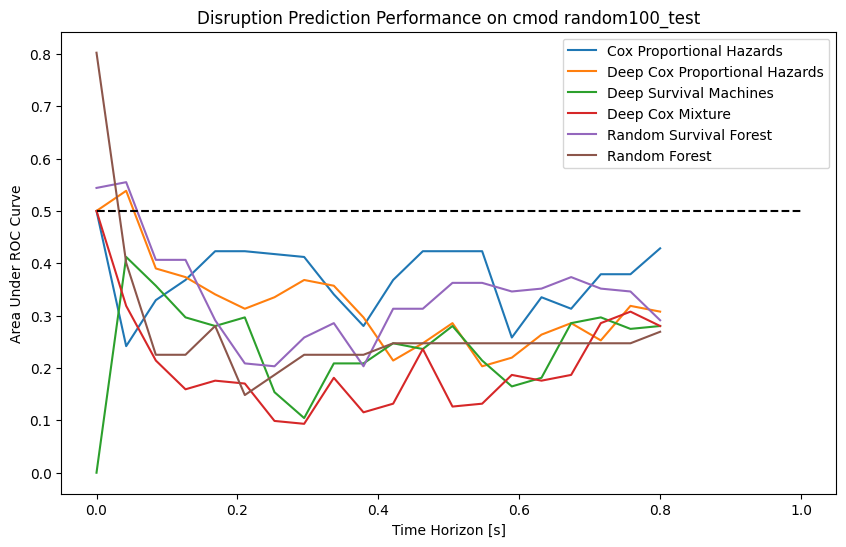

In [97]:
# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(horizons, au_rocs_cph, label='Cox Proportional Hazards')
plt.plot(horizons, au_rocs_dcph, label='Deep Cox Proportional Hazards')
plt.plot(horizons, au_rocs_dsm, label='Deep Survival Machines')
plt.plot(horizons, au_rocs_dcm, label='Deep Cox Mixture')
plt.plot(horizons, au_rocs_rsf, label='Random Survival Forest')
plt.plot(horizons, au_rocs_rf, label='Random Forest')

# Plot horizontal line at y = 0.5 for reference to 'random guessing'
plt.plot([0, 1], [0.5, 0.5], linestyle='--', color='black')

plt.xlabel('Time Horizon [s]')
plt.ylabel('Area Under ROC Curve')
plt.title('Disruption Prediction Performance on '+device+' '+dataset+'_test')
plt.legend()
plt.show()



c:\Users\zkeith\Documents\Risk-Aware Frameworks\disruption-survival-analysis\plot_utils.py:43: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


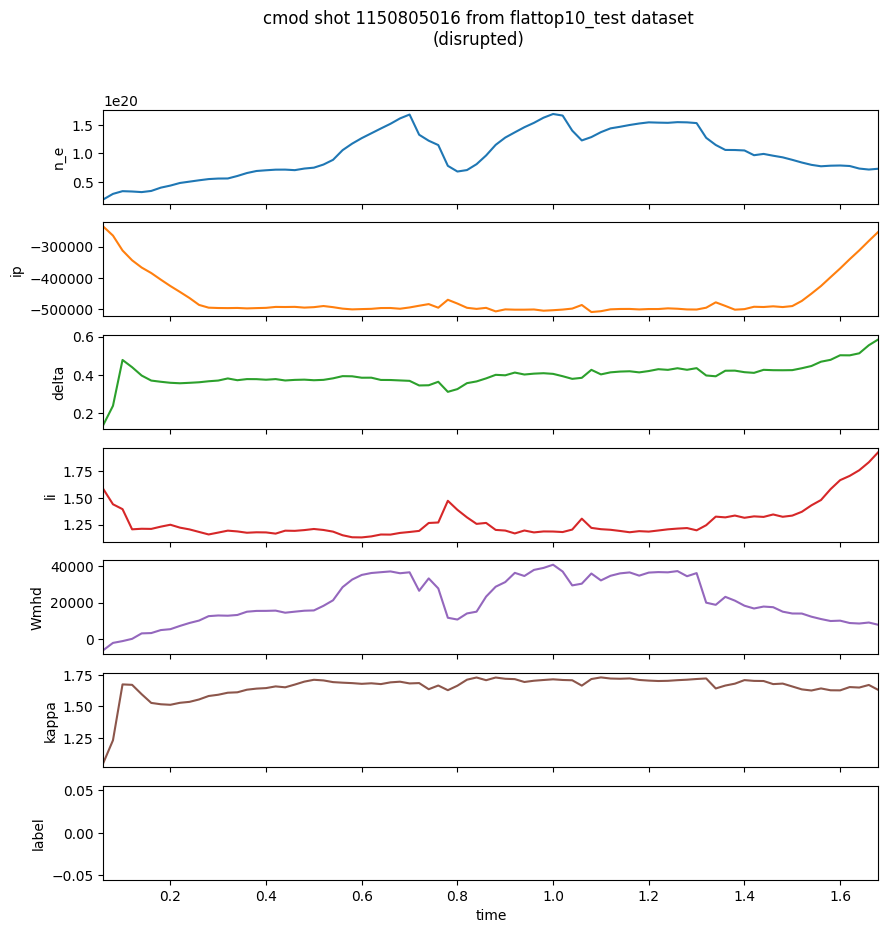

In [34]:
#plot_shot(device, dataset+'_test', 1150805022)
plot_shot(device, dataset+'_test', 1150805016)